<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Initialize-Free-Wave-Packet" data-toc-modified-id="Initialize-Free-Wave-Packet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initialize Free Wave Packet</a></span></li><li><span><a href="#Wave-Packet-in-Well" data-toc-modified-id="Wave-Packet-in-Well-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Wave Packet in Well</a></span><ul class="toc-item"><li><span><a href="#Estimating-the-Coefficients" data-toc-modified-id="Estimating-the-Coefficients-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Estimating the Coefficients</a></span></li><li><span><a href="#Distribution-of-Coefficients" data-toc-modified-id="Distribution-of-Coefficients-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Distribution of Coefficients</a></span></li></ul></li><li><span><a href="#Time-Evolution" data-toc-modified-id="Time-Evolution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Evolution</a></span></li><li><span><a href="#Show-Wavepacket" data-toc-modified-id="Show-Wavepacket-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Show Wavepacket</a></span></li><li><span><a href="#Show-Animation" data-toc-modified-id="Show-Animation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Show Animation</a></span></li></ul></div>

# Imports

In [36]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation

plt.style.use("ggplot")

# Initialize Free Wave Packet

In [31]:
sigma = 10 * 1e-9
L = 200 * 1e-9
x0 = 50 * 1e-9

hbar = 1.055 * 1e-34
E = 0.2*1.602 * 1e-19
m = 9.109 * 1e-31

p = np.sqrt(2*m*E)

In [32]:
def plot_wavepacket():
    x = np.linspace(0, L, 1000)

    psi = np.pi**(-0.25)*np.sqrt(1.0/sigma) * np.exp(-(x-x0)**2/(2*sigma**2) + 1j*p*(x-x0)/hbar)
    psi_2 = np.abs(psi)**2
    
    plt.figure()
    plt.plot(x * 1e9, psi_2) 
    plt.xlabel(r"$x [nm]$", fontsize=16)
    plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16) 
    plt.show()

# Wave Packet in Well

In [33]:
def trap(f, h):
    intgr = 0.5 * h * (f[0] + f[-1])
    for i in range(1, f.shape[0]-1):
        intgr = intgr + h * f[i]
    return intgr

## Estimating the Coefficients 

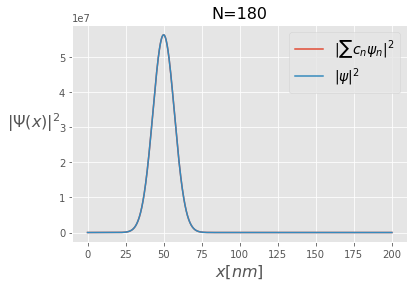

In [17]:
N = 180
n_list = np.linspace(1, N, N)
x = np.linspace(0, L, 1000)
psi = np.pi**(-0.25)*np.sqrt(1.0/sigma) * np.exp(-(x-x0)**2/(2*sigma**2) + 1j*p*(x-x0)/hbar)
psi_2 = np.abs(psi) ** 2

def psi_n(n, x, L):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

def E_n(n, m, L):
    return n**2*np.pi**2*hbar**2/(2*m*L**2)

cns = np.empty(shape=n_list.shape, dtype="complex128")
for n in n_list:
    cn = trap(np.conj(psi_n(n, x, L)) * psi, np.abs(x[1]-x[0]))
    cns[int(n-1)] = cn
    
P = np.zeros(shape=psi.shape, dtype="complex128")
norm = (np.abs(cns)**2).sum()
for n, cn in zip(n_list, cns):
    P += cn/norm * psi_n(n, x, L)
    
plt.plot(x * 1e9, np.abs(P)**2, label=f"$|\sum c_n \psi_n|^2$")
plt.plot(x * 1e9, psi_2, label=f"$|\psi|^2$")
plt.xlabel(r"$x [nm]$", fontsize=16)
plt.ylabel(r"$|\Psi(x)|^2$", rotation=0, labelpad=25, fontsize=16)
plt.legend(fontsize=14)
plt.title(f"N={N}", fontsize=16)
plt.show()

   ## Distribution of Coefficients 

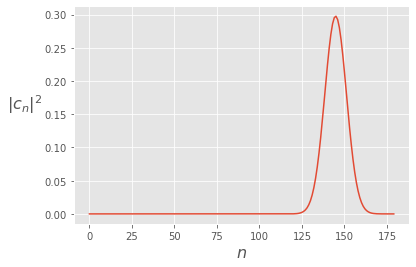

In [18]:
plt.plot(np.abs(cns))
plt.xlabel(r"$n$", fontsize=16)
plt.ylabel(r"$|c_n|^2$", rotation=0, labelpad=20, fontsize=16)
plt.show()

# Time Evolution

In [34]:
x = np.linspace(0, L, 1000)
t_vals = np.linspace(0, 160 * 1e-13, 400) 
norm = (np.abs(cns)**2).sum()

Pt = []
for t in t_vals:
    P = np.zeros(shape=psi.shape, dtype="complex128")
    for n, cn in zip(n_list, cns):
        time_prop = np.exp(-1j*E_n(n, m, L)*t/hbar)
        P += cn/norm * psi_n(n, x, L) * time_prop
    Pt.append(P)

In [20]:
def animate_wavepacket(Pt):
    fig, ax = plt.subplots(figsize=(8, 5))
    Pt = np.array(Pt)
    line = ax.plot(x * 1e9, np.abs(Pt[0, :])**2, color='tab:red', lw=2, label=r"$|\Psi(x,t)|^2$")[0]

    def animate(i):
        line.set_ydata(np.abs(Pt[i, :])**2)

    anim = FuncAnimation(fig, animate, interval=100, frames=len(t_vals)-1, repeat=True)
    plt.legend()
    plt.show()

# Show Wavepacket

In [66]:
%matplotlib inline
plt.style.use("ggplot")

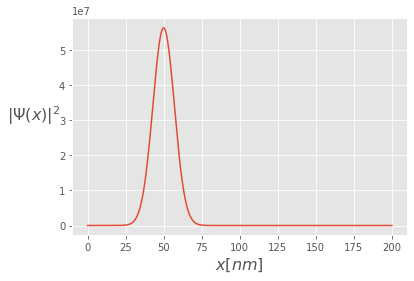

In [67]:
plot_wavepacket()

# Show Animation

In [73]:
%matplotlib notebook

<IPython.core.display.Javascript object>


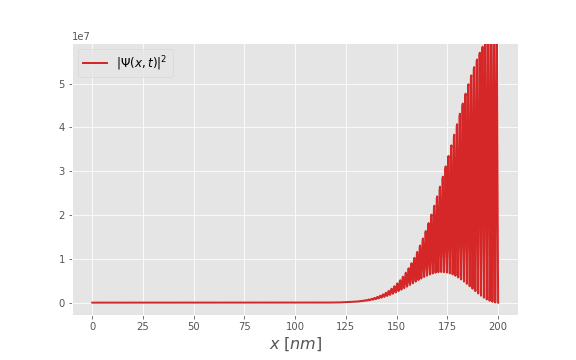

In [74]:
fig, ax = plt.subplots(figsize=(8, 5))
Pt = np.array(Pt)
line = ax.plot(x * 1e9, np.abs(Pt[0, :])**2, 
               color='tab:red', 
               lw=2, 
               label=r"$|\Psi(x,t)|^2$")[0]

def animate(i):
    line.set_ydata(np.abs(Pt[i, :])**2)

anim = FuncAnimation(fig, animate, interval=100, frames=len(t_vals)-1, repeat=True)
plt.legend(fontsize=12)
plt.xlabel(r"$x \; [nm]$", fontsize=16)
plt.show()